# Utilizando os dados de pacientes, faremos a previsão de quais tem doença hepática ou não.

## 1º Análise exploratória

###### Informações do conjunto de dados:

Retirado de: [Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29)

Este conjunto de dados contém 416 registros de pacientes hepáticos e 167 registros de pacientes não hepáticos. O conjunto de dados foi coletado no nordeste de Andhra Pradesh, Índia. Contém 441 registros de pacientes do sexo masculino e 142 registros de pacientes do sexo feminino.

Qualquer paciente cuja idade ultrapasse 89 anos é listado como tendo idade "90".

###### Informações sobre as colunas:
- Age: idade do paciente;
- Gender: gênero;
- Total_Bilirubin: Bilirrubina Total presente no corpo do paciente;
- Direct_Bilirubin: Bilirrubina Direta;
- Alkaline_Phosphotase: Fosfotase Alcalina;
- Alamine_Aminotransferase: Alamina Aminotransferase;
- Aspartate_Aminotransferase: Aspartato Aminotransferase;
- Total_Protiens: Proteínas Totais;
- Albumin: Albumina;
- Albumin_and_Globulin_Ratio: Proporção de Albumina e Globulina;
- Dataset: resultado para doença hepática.

In [ ]:
# Importando as bibliotecas:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score

In [ ]:
# Lendo o arquivo .CSV e visualizando seus 5 primeiros valores:
liver_patient = pd.read_csv('indian_liver_patient.csv')
liver_patient.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Tipos de variáveis e dimensão do dataframe:
liver_patient.info()
#### Como existe a variável "Gender" como 'objetct', será necessário fazer um tratamento p/ transformá-la em numérica.
#### Existem valores nulos na variável "Albumin_and_Globulin_Ratio".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
# Verificando se realmente existem 416 registros de pacientes hepáticos e 167 registros de pacientes não hepáticos.
liver_patient.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [ ]:
# Verificando se realmente existem 441 registros de pacientes do sexo masculino e 142 registros de pacientes do sexo feminino.
liver_patient.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [ ]:
# Detalhes estatísticos básicos:
liver_patient.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## 2º Pré-processamento dos dados

In [ ]:
# Eliminando valores nulos:
liver_patient.dropna(subset=['Albumin_and_Globulin_Ratio'],inplace=True)
liver_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [ ]:
# One Hot Encoding: transformação para representarmos uma variável categórica de forma binária, para ser possível elaborar as regressões.
liver_patient.Gender = pd.get_dummies(liver_patient.Gender, drop_first = True)
liver_patient.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Verificando a correlação de pares:
liver_patient.corr().Dataset.sort_values(ascending=False)
#### As colunas com menor correlação são: 'Total_Protiens', 'Gender' e 'Age'.
#### As com maior correlação são: 'Direct_Bilirubin', 'Total_Bilirubin' e 'Alkaline_Phosphotase'.

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.159770
Total_Protiens                0.033614
Gender                       -0.081349
Age                          -0.133164
Aspartate_Aminotransferase   -0.151834
Alamine_Aminotransferase     -0.163117
Alkaline_Phosphotase         -0.183363
Total_Bilirubin              -0.220218
Direct_Bilirubin             -0.246273
Name: Dataset, dtype: float64

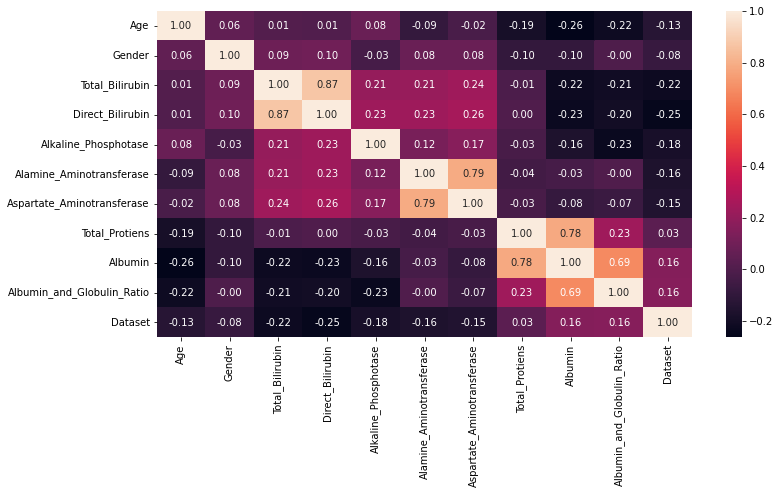

In [ ]:
# Verificando a correlação visualmente:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(liver_patient.corr(), annot=True, fmt='.2f')
#### Observa-se que a Alamine_Aminotransferase tem muita correlação com Aspartate_Aminotransferase. Assim como a Direct_Bilirubin tem uma alta correlação com Total_Bilirubin e Albumin com Total_Protiens. 
#### Poderia ser interessante excluir um desses fatores, para obsevar se o modelo teria uma performance melhor . 

In [ ]:
# Determinando as variáveis em dependentes e independentes:
X = liver_patient.iloc[:, 0:10]
y = liver_patient.iloc[:, 10]

In [ ]:
# Train Test Split (utilizando o conjunto de dados train para treinar o modelo e, com um conjunto de dados nunca visto antes, o test , ver como o modelo lida com dados novos):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3º Máquina preditiva

#### Random Forest Classifier (utilizado pois o resultado 'Dataset' é binário):

In [ ]:
# Random Forest Classifier:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

# Predição:
y_pred = rfc.predict(X_test)

# Comparação valores reais x previstos
real_vs_previsto = pd.DataFrame({'Gabarito (valor real)': y_test,
                                 'Previsão_Máquina_Preditiva': y_pred})
real_vs_previsto

,Gabarito (valor real),Previsão_Máquina_Preditiva
192,1,1
423,2,1
354,1,1
414,2,1
484,1,1
...,...,...
197,1,2
249,1,1
411,2,1
74,1,1


In [ ]:
# Pontuação do modelo:
print('Métricas de classificação: \n', classification_report(y_test, y_pred))
print('Acurácia: \n', accuracy_score(y_test, y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))
print('Pontuação de recordação: \n', recall_score(y_test,y_pred))

Métricas de classificação: 
               precision    recall  f1-score   support

           1       0.76      0.90      0.82        82
           2       0.56      0.29      0.38        34

    accuracy                           0.72       116
   macro avg       0.66      0.60      0.60       116
weighted avg       0.70      0.72      0.69       116

Acurácia: 
 0.7241379310344828
Matriz de confusão: 
 [[74  8]
 [24 10]]
Pontuação de recordação: 
 0.9024390243902439


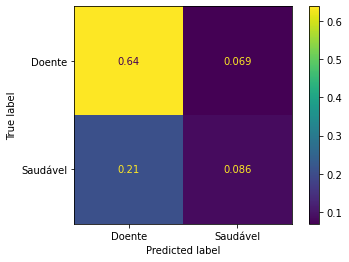

In [ ]:
# Matriz de confusão:
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm,display_labels=['Doente', 'Saudável'])
cmd.plot()

#### XGBClassifier (utilizado pois o resultado 'Dataset' é binário):

In [ ]:
# XGBClassifier:
XGB = XGBClassifier(learning_rate=1.5, max_depth=10)
XGB = XGB.fit(X_train, y_train)

# Predição:
y_pred = XGB.predict(X_test)

# Comparação valores reais x previstos
real_vs_previsto = pd.DataFrame({'Gabarito (valor real)': y_test,
                                 'Previsão_Máquina_Preditiva': y_pred})
real_vs_previsto

,Gabarito (valor real),Previsão_Máquina_Preditiva
192,1,1
423,2,1
354,1,1
414,2,2
484,1,1
...,...,...
197,1,2
249,1,1
411,2,2
74,1,1


In [ ]:
# Pontuação do modelo:
print('Métricas de classificação: \n', classification_report(y_test, y_pred))
print('Acurácia: \n', accuracy_score(y_test, y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))
print('Pontuação de recordação: \n', recall_score(y_test,y_pred))

Métricas de classificação: 
               precision    recall  f1-score   support

           1       0.80      0.85      0.83        82
           2       0.59      0.50      0.54        34

    accuracy                           0.75       116
   macro avg       0.70      0.68      0.68       116
weighted avg       0.74      0.75      0.74       116

Acurácia: 
 0.75
Matriz de confusão: 
 [[70 12]
 [17 17]]
Pontuação de recordação: 
 0.8536585365853658


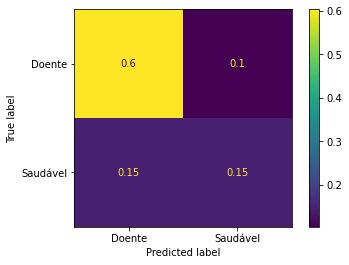

In [ ]:
# Matriz de confusão:
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm,display_labels=['Doente', 'Saudável'])
cmd.plot()

In [ ]:
#### Optei por deixar o learning_rate=1.5 e max_depth=10, pois foram os valores que apresentaram maior acurácia após alguns testes.
#### Porém, dependendo do objdeto dos médicos, poderia ser mais interessante minimizar os erros de pacientes doentes que foram apresentados como saudáveis, por exemplo, já que poderia ser um erro com maior potencial de problemas. 

#### Modelo final (XGBClassifier)

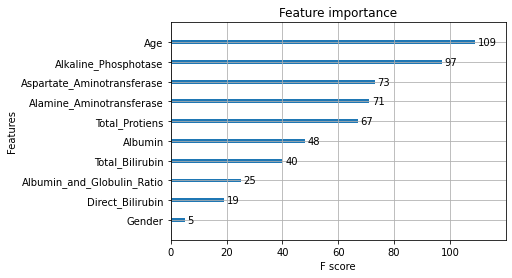

In [ ]:
# Quantificando a importância dos recursos:
XGB = XGBClassifier(learning_rate=1.5, max_depth=10)
XGB = XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)

plot_importance(XGB)